<a href="https://colab.research.google.com/github/mukund2124/CNN-cat-dogs-classification/blob/main/dogcatfight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 23.5MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.0MB/s]


In [2]:
import zipfile
zip_data = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_data.extractall('/content/')
zip_data.close()

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import matplotlib.pyplot as plt
import cv2

In [4]:
# Generators

train_ds = tf.keras.utils.image_dataset_from_directory(
              directory='/content/train',
              labels='inferred',
              label_mode='int',
              batch_size=32,
              image_size=(256, 256)
          )


test_ds = tf.keras.utils.image_dataset_from_directory(
              directory='/content/test',
              labels='inferred',
              label_mode='int',
              batch_size=32,
              image_size=(256, 256)
          )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
# Normalization

def scale_down_px(image, label):

  image = tf.cast(image/255, tf.float32)

  return image, label

In [6]:
from keras import applications
from tensorflow.keras.applications import VGG16
from keras.layers import BatchNormalization, Dropout
# Define model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False  # Freeze pre-trained layers

model = Sequential()
model.add(base_model)
model.add(Conv2D(32, (3,3), padding = 'valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding = 'valid'))

model.add(Conv2D(64, (3,3), padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, (3,3), padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(256, (3,3), padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(512, (3,3), padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
# Final output layer with softmax activation for multi-class classification, sigmoid for binary :)
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds,  validation_data = test_ds, epochs=10)

58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/10
625/625 [==============================] - 143s 204ms/step - loss: 0.1166 - accuracy: 0.9560 - val_loss: 0.0995 - val_accuracy: 0.9684
Epoch 2/10
625/625 [==============================] - 146s 233ms/step - loss: 0.0697 - accuracy: 0.9759 - val_loss: 0.0611 - val_accuracy: 0.9780
Epoch 3/10
625/625 [==============================] - 131s 209ms/step - loss: 0.0512 - accuracy: 0.9834 - val_loss: 0.0560 - val_accuracy: 0.9776
Epoch 4/10
625/625 [==============================] - 130s 208ms/step - loss: 0.0400 - accuracy: 0.9859 - val_loss: 0.0628 - val_accuracy: 0.9760
Epoch 5/10
625/625 [==============================] - 131s 209ms/step - loss: 0.0315 - accuracy: 0.9895 - val_loss: 0.0794 - val_accuracy: 0.9794
Epoch 6/10
625/625 [==============================] - 146s 233ms/step - loss: 0.0253 - accuracy: 0.9913 - val_loss: 0.0750 - val_accuracy: 0.9766
Epoch 7/10
625/625 [==============================] - 131s 

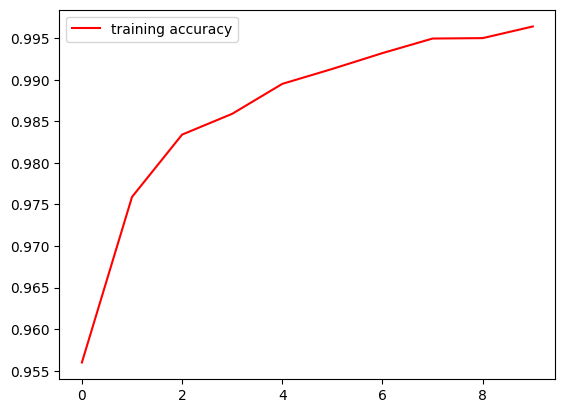

In [7]:
plt.plot(history.history['accuracy'], color='r', label='training accuracy')
plt.legend()
plt.show()

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 conv2d (Conv2D)             (None, 6, 6, 32)          147488    
                                                                 
 batch_normalization (Batch  (None, 6, 6, 32)          128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 batch_normalization_1 (Bat  (None, 3, 3, 64)          2

In [58]:
test_img = cv2.imread('/content/doggy.jpeg')
test_img = cv2.resize(test_img, (256, 256))

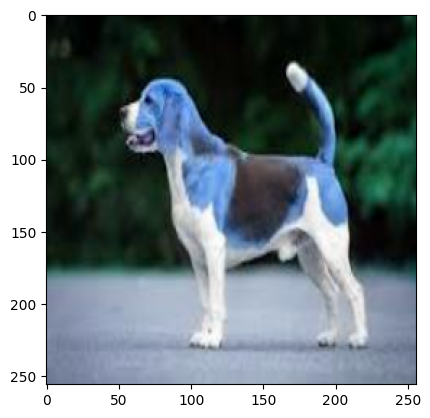

In [59]:
plt.imshow(test_img)

In [60]:
test_img.shape

(256, 256, 3)

In [61]:
test_input = test_img.reshape(1, 256, 256, 3)

In [19]:
test_input


array([[[[ 40,  31,  27],
         [ 33,  24,  20],
         [ 24,  13,   9],
         ...,
         [158, 161, 129],
         [156, 159, 127],
         [154, 157, 125]],

        [[ 45,  36,  32],
         [ 50,  41,  37],
         [ 41,  30,  26],
         ...,
         [159, 162, 130],
         [156, 159, 127],
         [154, 157, 125]],

        [[ 46,  40,  33],
         [ 54,  48,  42],
         [ 53,  45,  38],
         ...,
         [160, 162, 130],
         [157, 160, 128],
         [155, 158, 126]],

        ...,

        [[120, 165, 178],
         [116, 161, 174],
         [111, 155, 168],
         ...,
         [ 10, 183, 186],
         [ 11, 169, 175],
         [ 13, 160, 167]],

        [[112, 152, 166],
         [105, 147, 160],
         [ 96, 140, 153],
         ...,
         [  7, 183, 186],
         [  7, 170, 176],
         [  6, 161, 167]],

        [[107, 143, 156],
         [ 98, 135, 150],
         [ 93, 135, 148],
         ...,
         [  5, 183, 186],
        

In [62]:
output = model.predict(test_input)[0][0]
print(f'Output is: {output} \n')

if output < 0.5:
  print('This is a Cat')
else:
  print('This is a Dog')

1/1 [==============================] - 0s 29ms/step
Output is: 1.0 

This is a Dog


Evaluation

In [35]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
100% 217M/218M [00:10<00:00, 23.0MB/s]
100% 218M/218M [00:10<00:00, 21.7MB/s]


In [36]:
import zipfile
zip_data = zipfile.ZipFile('/content/cat-and-dog.zip')
zip_data.extractall('/content/')
zip_data.close()

In [57]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths (replace with your actual paths)
test_data_dir = "/content/training_set/training_set/dogs"
#model_path = "path/to/your/saved/model"

# Create a data generator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values

# Load test images using the data generator (adjust batch size if needed)
test_generator = tf.keras.utils.image_dataset_from_directory(
              directory='/content/test_set/test_set',
              labels='inferred',
              label_mode='int',
              batch_size=32,
              image_size=(256, 256)
          )
# Load your trained model
# model = tf.keras.models.load_model(model_path)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)

# Print the results
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Found 2023 files belonging to 2 classes.
64/64 [==============================] - 12s 164ms/step - loss: 0.0330 - accuracy: 0.9926
Test Loss: 0.0330, Test Accuracy: 0.9926


In [74]:
from sklearn.metrics import precision_score, recall_score, average_precision_score
from sklearn.metrics import classification_report, average_precision_score
# Get predictions and true labels
y_pred = model.predict(test_generator)
y_true = []
for images, labels in test_generator:
    y_true.extend(labels.numpy())

# Convert predicted probabilities to class predictions
y_pred_class = tf.argmax(y_pred, axis=1)

# Calculate precision, recall, and mAP
print(classification_report(y_true, y_pred_class))
mAP = average_precision_score(y_true, y_pred_class)

# Print the results
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
print(f"mAP (mean Average Precision): {mAP:.4f}")


64/64 [==============================] - 11s 166ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1011
           1       0.00      0.00      0.00      1012

    accuracy                           0.50      2023
   macro avg       0.25      0.50      0.33      2023
weighted avg       0.25      0.50      0.33      2023

Test Loss: 0.0330, Test Accuracy: 0.9926
mAP (mean Average Precision): 0.5002


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
